In [85]:
import ROOT as R
%jsroot off
R.gStyle.SetOptStat(0)
c=R.TCanvas()

In [2]:
f1= R.TF1("f1","[0]*TMath::Landau(x,[1],[2]) ", 0,200)


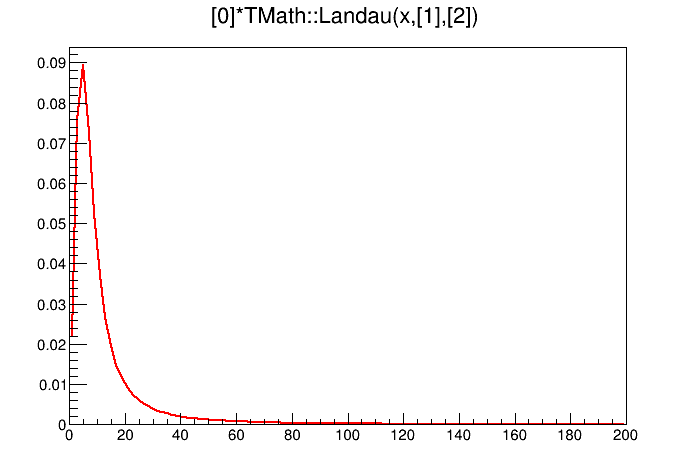

In [3]:
f1.SetParameters(0.5,5,2)
f1.Draw("")
c.Draw()

In [4]:
f1.Integral(0,200)

0.987333008464002

In [5]:
f2= R.TF1("f2","[0]*TMath::Poisson(x,[1]) ", 0,200)


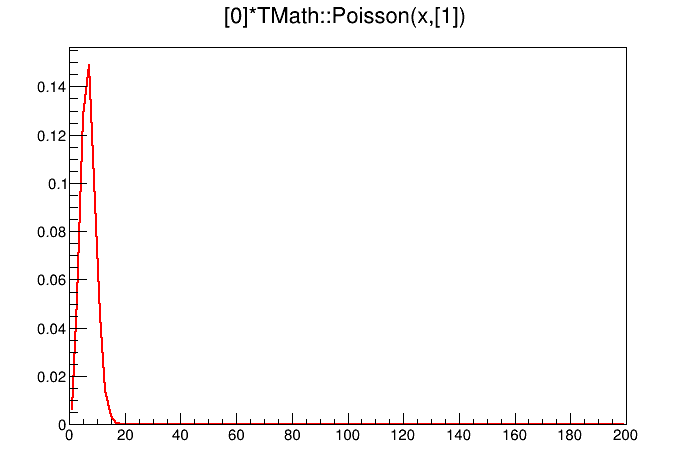

In [6]:
f2.SetParameters(1,7)
f2.Draw("")
c.Draw()

In [7]:
f2.Integral(0,200)

0.9997280797465371

In [8]:
conv = R.TF1Convolution("f1","f2",True)


Info in <TF1Convolution::TF1Convolution>: Using default range [-inf, inf] for TF1Convolution
Warning in <TF1Convolution::TF1Convolution::SetRange()>: In FFT mode, range can not be infinite. Infinity has been replaced by range of first function plus a bufferzone to avoid spillover.


In [9]:
f3 = R.TF1("f3",conv, 0, 200, conv.GetNpar())

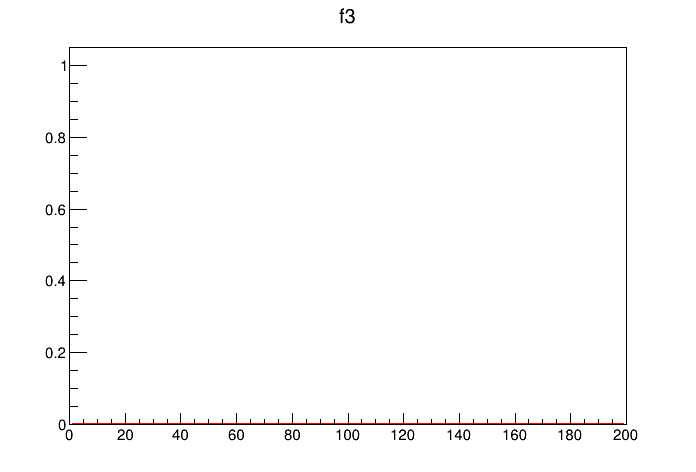

In [10]:
f3.Draw()
c.Draw()

In [47]:
f3.Integral(0,200)

0.0

In [86]:
# Construct observable
t = R.RooRealVar("t", "t", -10, 100)

# Construct landau(t,ml,sl)
ml = R.RooRealVar("ml", "mean landau", 3., -20, 20)
sl = R.RooRealVar("sl", "sigma landau", 1, 0.1, 10)
landau = R.RooLandau("lx", "lx", t, ml, sl)

# Construct poisson(t,mg)
mg = R.RooRealVar("mg", "mg", 8)
poisson = R.RooPoisson("poisson", "poisson", t, mg)

# C o n s t r u c t   c o n v o l u t i o n   p d f
# ---------------------------------------*

# Set #bins to be used for FFT sampling to 10000
t.setBins(10000, "cache")

# Construct landau (x) poisson
lxp = R.RooFFTConvPdf("lxp", "landau (X) poisson", t, landau, poisson)

# S a m p l e , i t   a n d   p l o t   c o n v o l u t e d   p d f
# ----------------------------------------------------------------------




In [87]:
# Sample 1000 events in x from gxlx
data = lxp.generate(R.RooArgSet(t), 1000)
# Fit gxlx to data
# lxp.fitTo(data)


In [88]:
# Plot data, pdf, landau (X) gauss pdf
frame = t.frame(R.RooFit.Title("landau (x) gauss convolution"))
# data.plotOn(frame)
lxp.plotOn(frame)
landau.plotOn(frame, R.RooFit.LineStyle(R.kDashed),R.RooFit.LineColor(2))
poisson.plotOn(frame, R.RooFit.LineStyle(R.kDashed))

<ROOT.RooPlot object ("frame_t_55dbdb1718c0") at 0x55dbdb1718c0>

[#1] INFO:Eval -- RooRealVar::setRange(t) new range named 'refrange_fft_lxp' created with bounds [-10,100]
[#1] INFO:Caching -- RooAbsCachedPdf::getCache(lxp) creating new cache 0x55dbdb009810 with pdf lx_CONV_poisson_CACHE_Obs[t] for nset (t) with code 0 from preexisting content.
[#1] INFO:NumericIntegration -- RooRealIntegral::init(lx_Int[t]) using numeric integrator RooIntegrator1D to calculate Int(t)


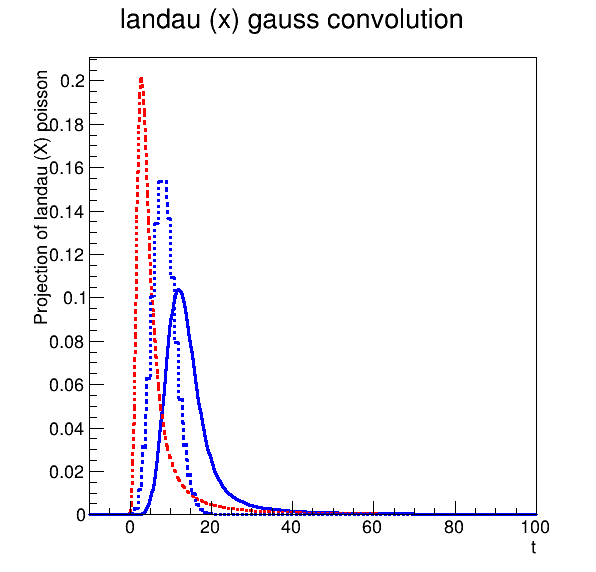

In [89]:

# Draw frame on canvas
c = R.TCanvas("rf208_convolution", "rf208_convolution", 600, 600)
R.gPad.SetLeftMargin(0.15)
frame.GetYaxis().SetTitleOffset(1.4)
frame.Draw()
c.Draw()

In [90]:
t.setRange("not_overflow",0,32)

[#1] INFO:Eval -- RooRealVar::setRange(t) new range named 'not_overflow' created with bounds [0,32]


In [91]:
a=lxp.createIntegral(R.RooArgSet(t),R.RooArgSet(t),"not_overflow")

[#1] INFO:Caching -- RooAbsCachedPdf::getCache(lxp) creating new cache 0x55dbdb437250 with pdf lx_CONV_poisson_CACHE_Obs[t] for nset (t) with code 0 from preexisting content.


In [92]:
a.Print()

RooRealIntegral::lxp_Int[t|not_overflow]_Norm[t][ Int lxp_Norm(t)  d[Num](t) ] = [#1] INFO:NumericIntegration -- RooRealIntegral::init(lxp_Int[t|not_overflow]_Norm[t]) using numeric integrator RooIntegrator1D to calculate Int(t)
0.954649
